<a href="https://colab.research.google.com/github/UTDataMining/2022A/blob/main/lab7/food_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 都道府県のクラスタリング

[教育用標準データセット](https://www.nstac.go.jp/SSDSE/)の都道府県庁所在市別、家計消費データを元に都道府県をクラスタリング

In [ ]:
!pip install japanize_matplotlib
!pip install japanmap

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
from sklearn.cluster import KMeans 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import japanize_matplotlib
import japanmap as jm

In [ ]:
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/lab7/food_consumption.csv

In [4]:
df = pd.read_csv('food_consumption.csv', encoding='utf-8')

In [5]:
df.head()

,都道府県,穀類,魚介類,肉類,乳卵類,野菜,果物,調味料,菓子類,調理食品,飲料,酒類,外食
0,北海道,82676,84409,88924,43623,109625,40236,42187,87897,98189,55654,56700,149627
1,青森県,73381,91038,85124,41247,110936,39627,42268,79745,115090,59434,54721,104675
2,岩手県,80606,78745,78211,52656,119016,43401,48429,88573,119747,59845,51482,129824
3,宮城県,73349,89873,86429,50265,125021,44687,44471,91333,123489,58714,45245,135154
4,秋田県,67703,84524,82274,43579,121980,44522,43840,83968,109129,51428,57364,119820


In [6]:
features = ['穀類', '魚介類', '肉類', '乳卵類', '野菜', '果物', '調味料', '菓子類', '調理食品', '飲料', '酒類', '外食']
X = df[features].values 
X = (X-np.mean(X, axis=0))/np.std(X, axis=0)

### 階層化クラスタリング

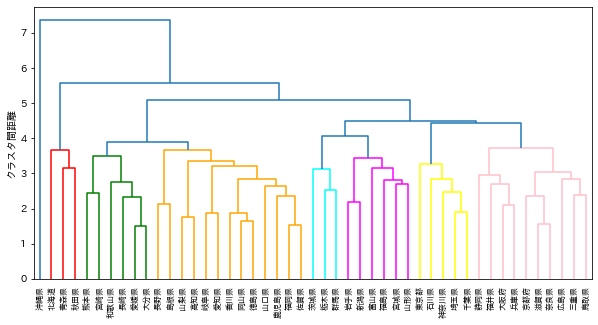

In [7]:
clusters = linkage(X, metric = 'euclidean', method = 'average') 
set_link_color_palette(['red', 'green', 'orange', 'cyan', 'magenta', 'yellow', 'pink'])
plt.figure(figsize=(10,5))
dendrogram(clusters, labels=df['都道府県'].values,  color_threshold=3.8) 
plt.ylabel('クラスタ間距離') 
plt.show()

### K-means法

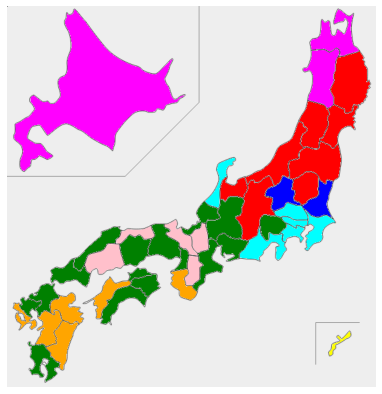

In [8]:
model = KMeans(n_clusters=8, random_state=0)
model.fit(X) 
df['cluster'] = model.predict(X)

colors = {0:'red', 1:'green', 2:'orange', 3:'cyan', 4:'magenta', 5:'yellow', 6:'pink', 7:'blue'}     
pref_color = {} 
for i in range(len(df)):
    pref_color[df.loc[i, '都道府県']] = colors[df.loc[i, 'cluster']]
image=jm.picture(pref_color) 
plt.figure(figsize=(10,7))
plt.imshow(image) 
plt.axis('off')
plt.show()

## 都道府県の次元縮約

累積寄与率 0.5846936919212213


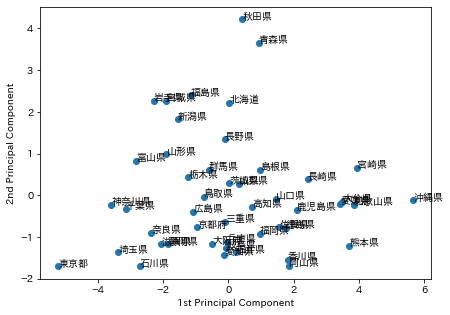

In [9]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) 
model.fit(X)
D = model.transform(X)
print('累積寄与率', np.sum(model.explained_variance_ratio_)) 
plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1]);
for i, label in enumerate(df['都道府県']):
    plt.annotate(label, (D[i,0], D[i,1]))

In [10]:
pd.DataFrame(model.components_, columns=features, index=["1st PC", "2nd PC"])

,穀類,魚介類,肉類,乳卵類,野菜,果物,調味料,菓子類,調理食品,飲料,酒類,外食
1st PC,-0.291798,-0.298591,-0.032451,-0.376096,-0.378802,-0.327250,-0.292045,-0.366139,-0.276695,-0.222365,-0.169120,-0.242193
2nd PC,-0.291051,0.294551,-0.414208,-0.075053,0.162069,0.327014,-0.010853,-0.088675,-0.258669,0.038282,0.477876,-0.461955


In [11]:
model = PCA(n_components=3) 
model.fit(X)
print('累積寄与率', np.sum(model.explained_variance_ratio_)) 
pd.DataFrame(model.components_, columns=features, index=["1st PC", "2nd PC", "3rd PC"])

累積寄与率 0.7119296090259094


,穀類,魚介類,肉類,乳卵類,野菜,果物,調味料,菓子類,調理食品,飲料,酒類,外食
1st PC,-0.291798,-0.298591,-0.032451,-0.376096,-0.378802,-0.327250,-0.292045,-0.366139,-0.276695,-0.222365,-0.169120,-0.242193
2nd PC,-0.291051,0.294551,-0.414208,-0.075053,0.162069,0.327014,-0.010853,-0.088675,-0.258669,0.038282,0.477876,-0.461955
3rd PC,-0.122259,-0.287214,-0.590182,-0.045382,-0.081096,0.111991,-0.228564,0.055129,0.278263,0.575249,-0.228108,0.131954


In [12]:
model = PCA(n_components=4) 
model.fit(X)
print('累積寄与率', np.sum(model.explained_variance_ratio_)) 
pd.DataFrame(model.components_, columns=features, index=["1st PC", "2nd PC", "3rd PC", "4th PC"])

累積寄与率 0.7836169013444196


,穀類,魚介類,肉類,乳卵類,野菜,果物,調味料,菓子類,調理食品,飲料,酒類,外食
1st PC,-0.291798,-0.298591,-0.032451,-0.376096,-0.378802,-0.327250,-0.292045,-0.366139,-0.276695,-0.222365,-0.169120,-0.242193
2nd PC,-0.291051,0.294551,-0.414208,-0.075053,0.162069,0.327014,-0.010853,-0.088675,-0.258669,0.038282,0.477876,-0.461955
3rd PC,-0.122259,-0.287214,-0.590182,-0.045382,-0.081096,0.111991,-0.228564,0.055129,0.278263,0.575249,-0.228108,0.131954
4th PC,0.483363,0.210556,-0.051715,-0.136044,0.221051,0.100578,-0.614635,-0.265149,0.353795,-0.216471,-0.037560,-0.142624
